'''Draw a set of vertical bar plots grouped by a categorical variable:

Categorical. Categorical variables take on values that are names or labels. The color of a ball (e.g., red, green, blue) 
or the breed of a dog (e.g., collie, shepherd, terrier) would be examples of categorical variables. '''

# Seaborn.barplot

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a line graph.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
d = {'furniture': ['chair', 'table', 'stool', 'toilet'], 'height': [1, 3, 2.5, 0.7], 
     'location': ['bedroom', 'kitchen', 'kitchen', 'bathroom'] }

df1 =pd.DataFrame(data=d)

dd = {'furniture': ['chair', 'table', 'stool', 'toilet', 'chair'], 'height': [1, 3, 2.5, 0.7, 4],
     'location': ['bedroom', 'kitchen', 'kitchen', 'bathroom', 'kitchen']}
df2 =pd.DataFrame(data=dd)
df2

furniture  height  location
0     chair     1.0   bedroom
1     table     3.0   kitchen
2     stool     2.5   kitchen
3    toilet     0.7  bathroom
4     chair     4.0   kitchen

In [117]:
df2[df2['furniture'] == 'chair']['height'].mean()

2.5

In [118]:
df2[df2['furniture'] == 'chair']['height'].std()

2.1213203435596424

In [119]:
df2[df2['furniture'] == 'table']['height'].std()

nan

In [120]:
df2[df2['furniture'] == 'chair']['height'].std()

2.1213203435596424

In [121]:
df2[df2['furniture'] == 'chair']['height'].std()

2.1213203435596424

"#barplot used both values for chair and calculated the mean: (1+4)/2 = 2.5 and then calculated error bars. \n#I thought they'd be standard deviation bars, which I calculate sd = 1.12, so I don't understand\n#why the bar is longer (it looks to be 1.5 long)"

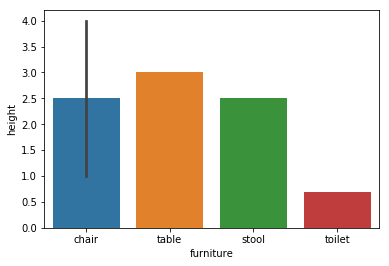

In [122]:
sns.barplot(x = 'furniture', y = 'height', data=df2)
'''#barplot used both values for chair and calculated the mean: (1+4)/2 = 2.5 and then calculated error bars. 
#I thought they'd be standard deviation bars, which I calculate sd = 1.12, so I don't understand
#why the bar is longer (it looks to be 1.5 long)'''

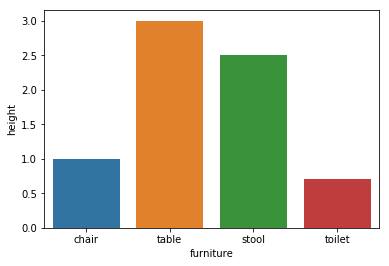

In [123]:
sns.barplot(x = 'furniture', y = 'height', data=df1)

Some of the palette names:

        coolwarm
        husl
        winter_r
        spring
        autumn

### Coefficient of thermal expansion of three metals (units: / °C)

In [71]:
# Raw data 
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

'''The means will be the height of each bar in our chart.'''
# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

'''standard deviation as the height of our error bars. The positive error will be show as +1 
standard deviation above the mean, and the negative error will be shown as -1 standard deviation below the mean

In datasets with a small spread all values are very close to the mean, resulting in a small variance and 
standard deviation. Where a dataset is more dispersed, values are spread further away from the mean, 
leading to a larger variance and standard deviation.

'''
# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)

# Create lists for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

Note the arguments passed into the ax.bar() method:

    x_pos is the array with the count of the number of bars.
    CTEs is our array which contains the means or heights of the bars.
    yerr=error sets the heights of the error bars and the standard deviations.
    keyword arguments (align='center', alpha=0.5, ecolor='black', capsize=10) styles the plot.
    
We'll put a label on the y-axis with the title "Coefficient of thermal expansion (°C-1)" using __ax.set_ylabel.__ We use __ax.set_xticks()__ to feed in our number list to set the bars as numbers 1, 2, 3. Then we add labels to these numbered bars with __ax.set_ticklabels().ax.set_title()__ and __ax.yaxis.grid(True)__ adds a title and horizontal grid lines.

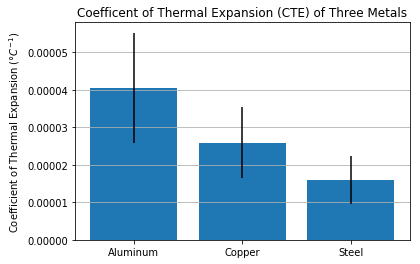

In [70]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error )
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

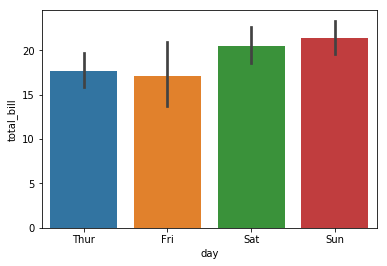

In [107]:
# sns.set(style="whitegrid")
tips= sns.load_dataset('tips')
sns.barplot('day','total_bill', data= tips)
# sns.barplot(x="tip", y="day", data=tips)  '''Draw a set of horizontal bars:'''

Visualize based on different categories in a column.

    'hue' is used to visualize the data of different categories in one plot.
    'palette' is used to change the colour of the plot.
    hue: 'sex' and palette: 'winter_r'

#### Draw a set of vertical bars with nested grouping by a two variables:


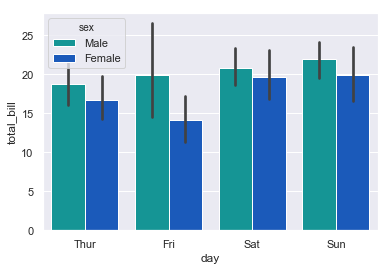

In [254]:
sns.barplot('day','total_bill',hue= 'sex' ,data= tips, palette='winter_r')

#### Passing an explicit order:

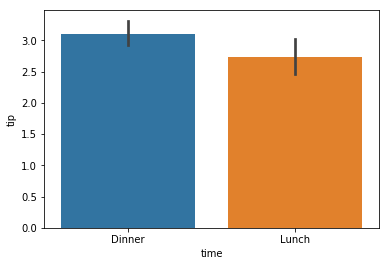

In [108]:
sns.barplot(x="time", y="tip", data=tips,order=["Dinner", "Lunch"])

Plot decribes the mean of tip on different days.

    Mean of all the tips on a particular day is calculatted and plotted on different days.
    If we don't mention anything, it calculates mean of that attribute.

#### Use median as the estimate of central tendency:

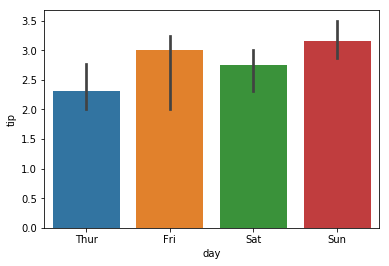

In [125]:
from numpy import median
sns.barplot(x="day", y="tip", data=tips, estimator=median)

####  standard error of the mean with the error bars

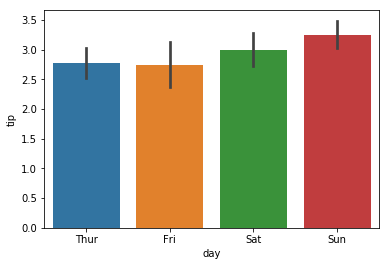

In [133]:
sns.barplot(x="day", y="tip", data=tips, ci=90)

#### standard deviation of observations instead of a confidence interval:

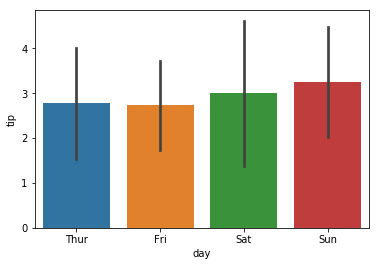

In [136]:
sns.barplot(x="day", y="tip", data=tips, ci="sd")

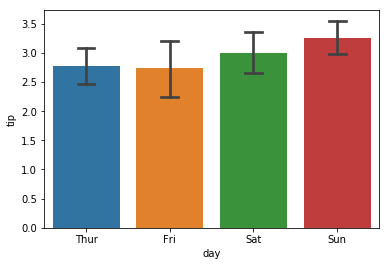

In [137]:
sns.barplot(x="day", y="tip", data=tips, capsize=.2)

# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")

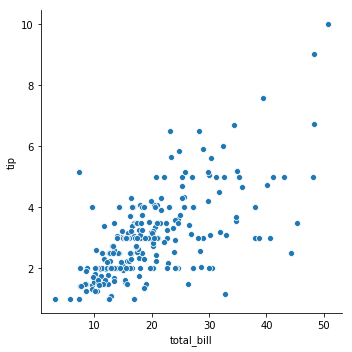

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips);

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.

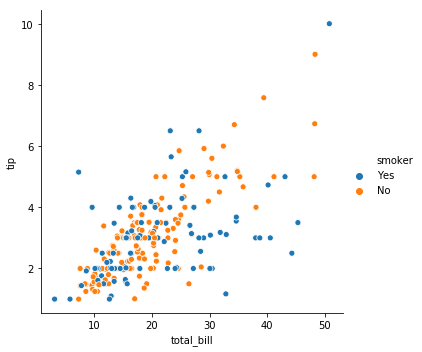

In [6]:
sns.relplot(x="total_bill", y="tip",hue = 'smoker', data = tips)

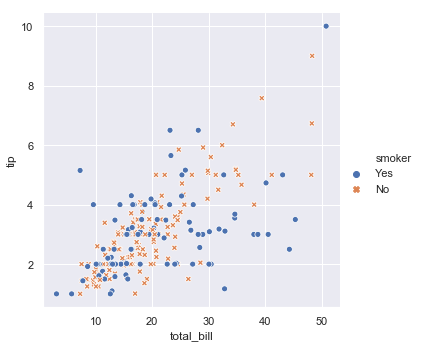

In [13]:
# To emphasize the difference between the classes, 
sns.set(style="darkgrid")

sns.relplot(x="total_bill", y="tip",hue = 'smoker',  style="smoker",data = tips)

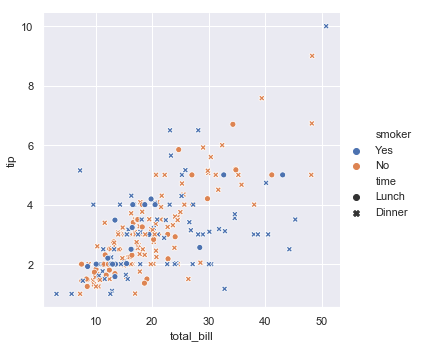

In [14]:
#  Represent four variables by changing the hue and style of each point independently
sns.relplot(x="total_bill", y="tip",hue = 'smoker',  style="time",data = tips)

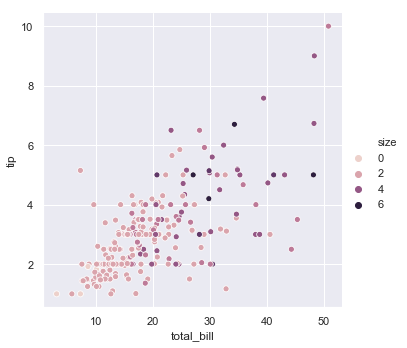

In [15]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

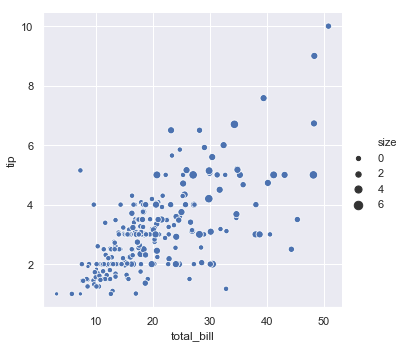

In [17]:
# variable changes the size of each point:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

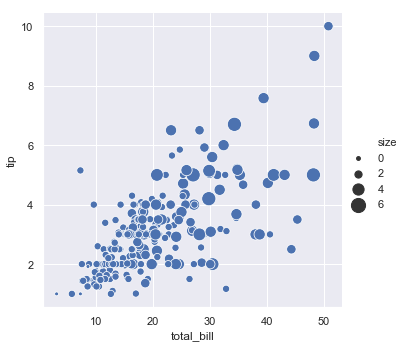

In [19]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

### Emphasizing continuity with line plots

you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
In this situation, a good choice is to draw a line plot

In [24]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.to_csv("lineplots.csv")

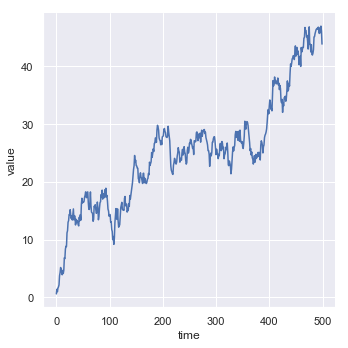

In [25]:
sns.relplot(x="time", y="value", kind="line", data=df)

In [26]:
fmri = sns.load_dataset("fmri")
fmri.to_csv("fmri.csv")

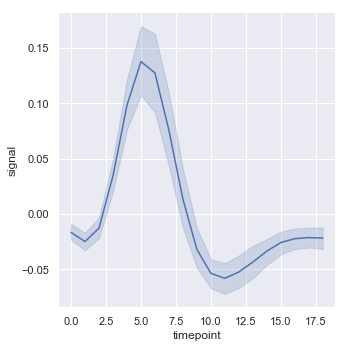

In [27]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

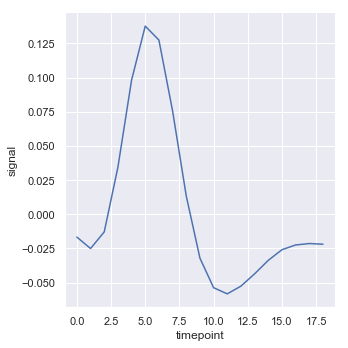

In [28]:
# confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets.
# It’s therefore possible to disable them

sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

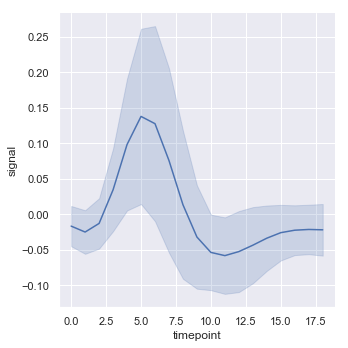

In [29]:
# For large dataset is to represent the spread of the distribution at each timepoint by plotting the 
# standard deviation instead of a confidence interval:

sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

mean - 1.96 times stdev over sqrt(n)
mean + 1.96 times stdev over sqrt(n)

Or  in pseudocode:

        def ci_wp(a):
            """calculate confidence interval using Wikipedia's formula"""
            m = np.mean(a)
            s = 1.96*np.std(a)/np.sqrt(len(a))
            return m - s, m + s

### Plotting subsets of data with semantic mappings
The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables 
by modifying the hue, size, and style of the plot elements.

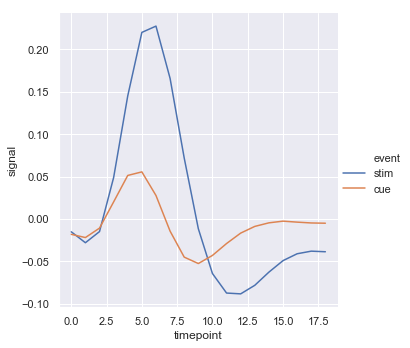

In [32]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line",data=fmri);

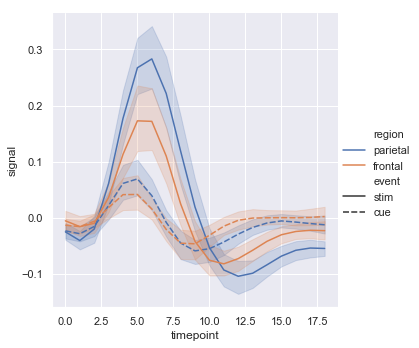

In [34]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line",style="event",data=fmri);

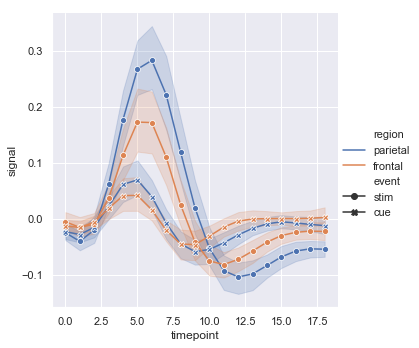

In [35]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

### Showing multiple relationships with facets

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

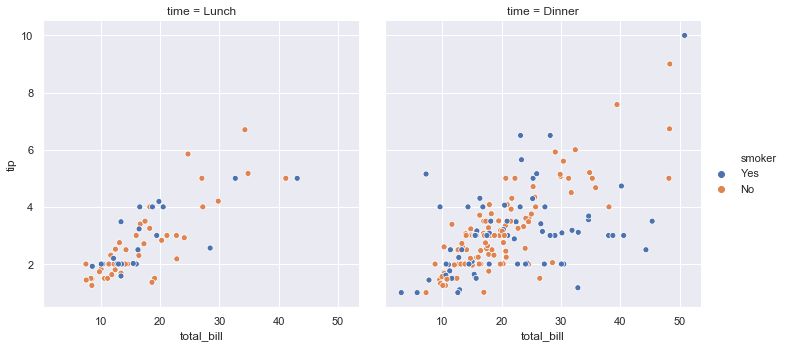

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size

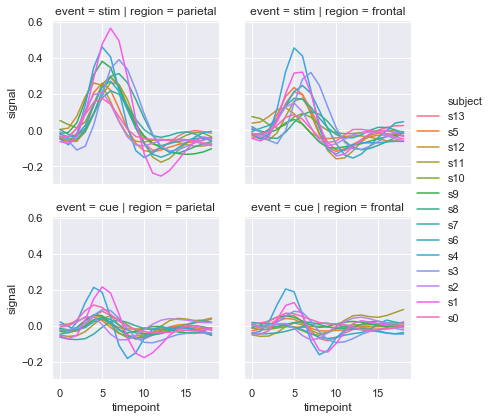

In [37]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows

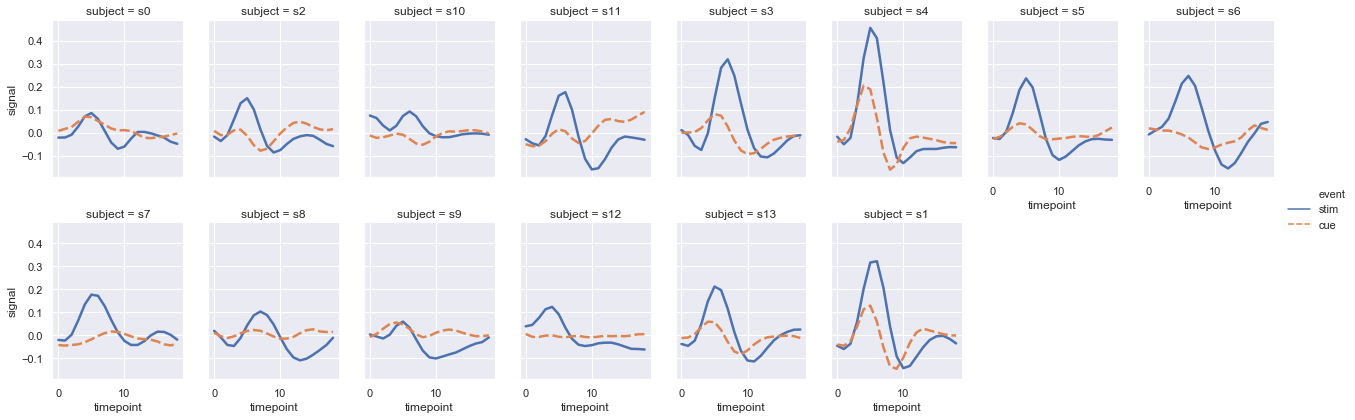

In [39]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=8,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

Categorical scatterplots:

    stripplot() (with kind="strip"; the default)
    swarmplot() (with kind="swarm")

Categorical distribution plots:

As the size of the dataset grows,, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

    boxplot() (with kind="box")
    violinplot() (with kind="violin")
    boxenplot() (with kind="boxen")
    
Categorical estimate plots:

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above

    pointplot() (with kind="point")
    barplot() (with kind="bar")
    countplot() (with kind="count")

# Categorical scatterplots
The default representation of the data in catplot() uses a scatterplot.

__Strip plot__
- A strip plot is a graphical data anlysis technique for summarizing a univariate data set.
- The strip plot consists of: Horizontal axis = the value of the response variable.
- It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets).

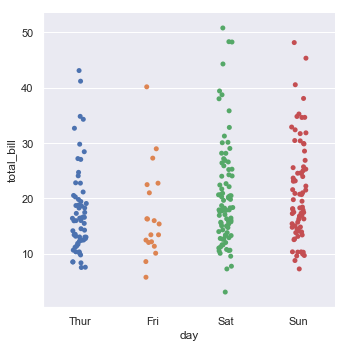

In [40]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);
sns.stripplot(x="day", y="total_bill", data=tips) ## Group the strips by a categorical variable:

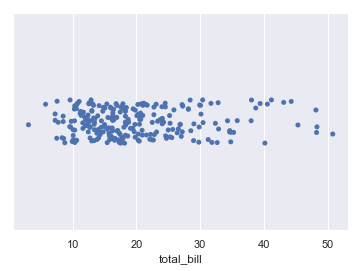

In [144]:
tips = sns.load_dataset("tips")
sns.stripplot(x=tips["total_bill"])

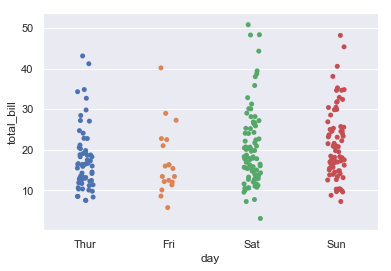

In [145]:
# Add jitter to bring out the distribution of values:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

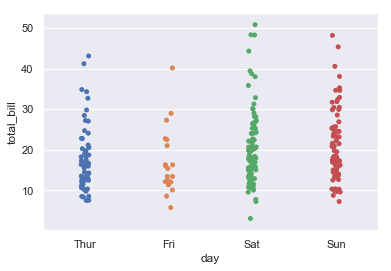

In [146]:
# Use smaller amount of jitter 
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

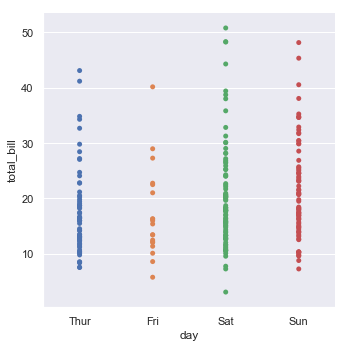

In [41]:
# The jitter parameter controls the magnitude of jitter or disables it altogether:

sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

#### Nest the strips within a second categorical variable:

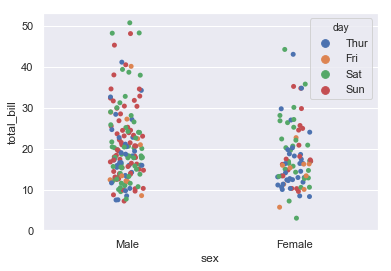

In [147]:
sns.stripplot(x="sex", y="total_bill", hue="day",data=tips, jitter=True)

#### Draw each level of the hue variable at different locations on the major categorical axis:

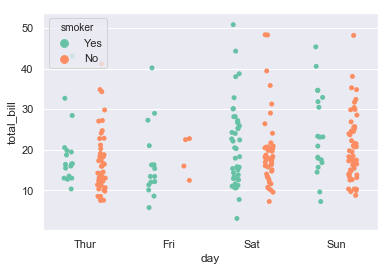

In [148]:
sns.stripplot(x="day", y="total_bill", hue="smoker",data=tips, jitter=True, palette="Set2", dodge=True)

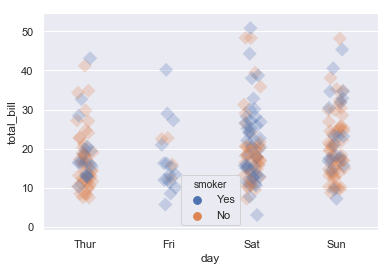

In [150]:
sns.stripplot("day", "total_bill", "smoker", data=tips,size=10, marker="D", alpha=.25)

A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

Box plot describes the data very well using quaterlies. Easy to find outliers.¶

In [255]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

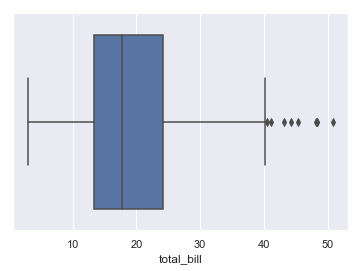

In [257]:
sns.boxplot(x=tips['total_bill'])

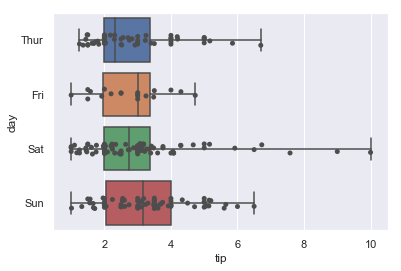

In [155]:
### Draw strips of observations on top of a box plot:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)  # to remove outlier whis=np.inf
sns.stripplot(x="tip", y="day", data=tips,jitter=True, color=".3")

#### Draw strips of observations on top of a violin plot:

- A violin plot is a method of plotting numeric data. It is similar to a box plot with a rotated kernel density plot on each side.
- A violin plot has four layers. The outer shape represents all possible results, with thickness indicating how common.
- The next layer inside represents the values that occur 95% of the time.

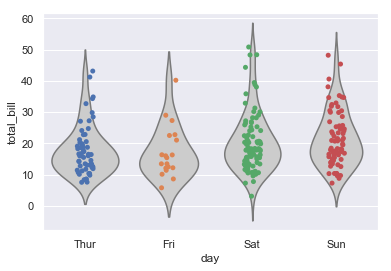

In [156]:
sns.violinplot(x="day", y="total_bill", data=tips,inner=None, color=".8")
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

Use catplot() to combine a stripplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

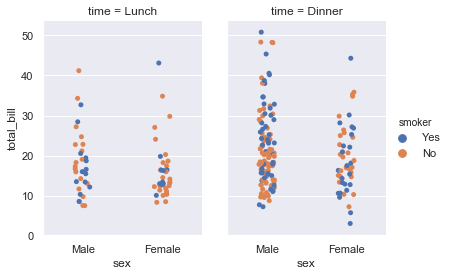

In [157]:
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="strip",jitter=True,height=4, aspect=.7);

__second approach__
adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations,This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot()

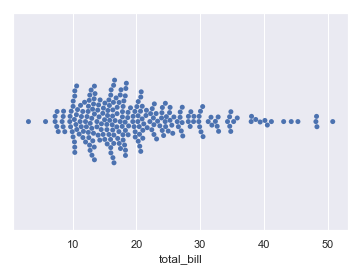

In [158]:
tips = sns.load_dataset("tips")
sns.swarmplot(x=tips["total_bill"])

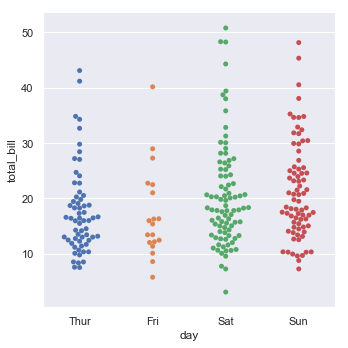

In [42]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);
sns.swarmplot(x="day", y="total_bill", data=tips)

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. __(The categorical plots do not currently support size or style semantics).__

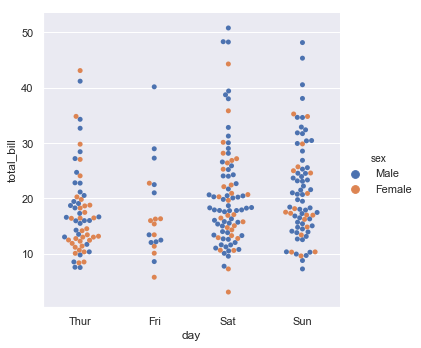

In [43]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

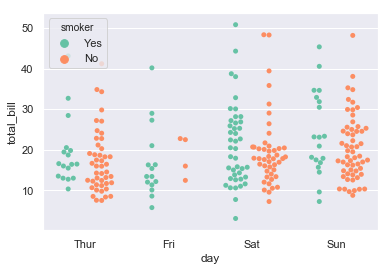

In [159]:
## Split each level of the hue variable along the categorical axis:

sns.swarmplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set2", dodge=True)

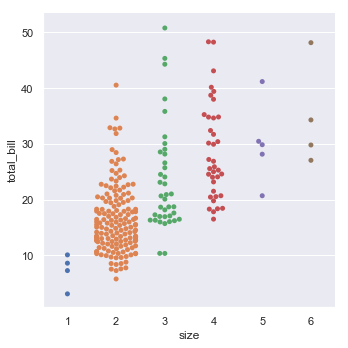

In [44]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

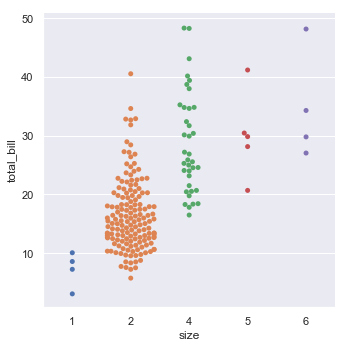

In [47]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))

# Change the order 
# sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

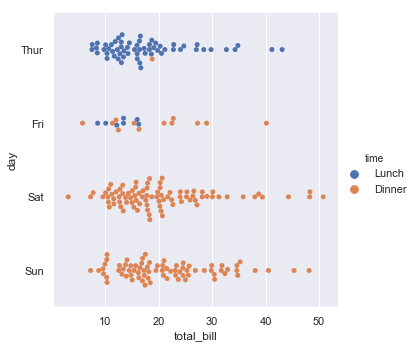

In [48]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

#### Draw swarms of observations on top of a box plot:

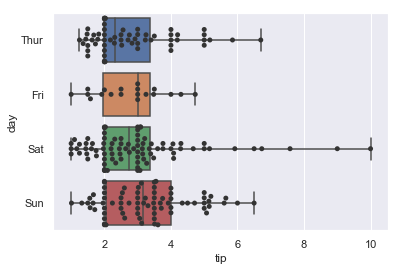

In [160]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf) ## remove outlier whis=np.inf
sns.swarmplot(x="tip", y="day", data=tips, color=".2")

#### Draw swarms of observations on top of a violin plot:

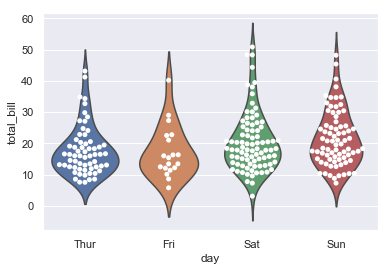

In [163]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips,color="white", edgecolor="gray")

Use catplot() to combine a swarmplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

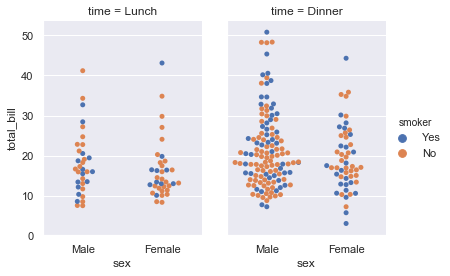

In [164]:
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="swarm",height=4, aspect=.7);

### Distributions of observations within categories
As the size of the dataset grows,, categorical scatter plots become limited in the information they can provide about the distribution of values within each category.

#### Boxplots
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

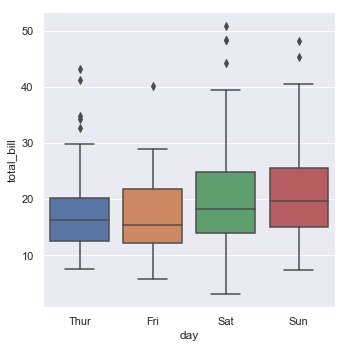

In [132]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.boxplot(x="day", y="total_bill", data=tips)

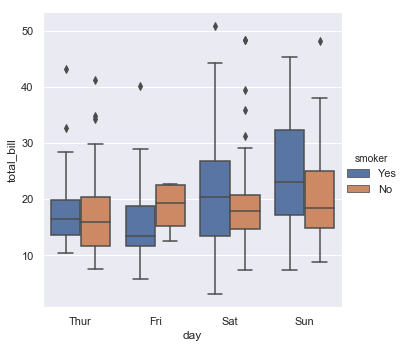

In [134]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips);

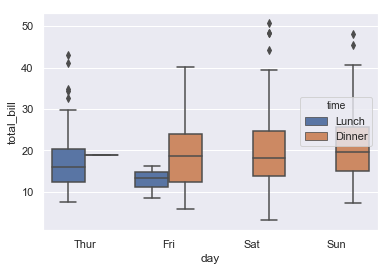

In [135]:
sns.boxplot(x="day", y="total_bill", hue="time",data=tips)

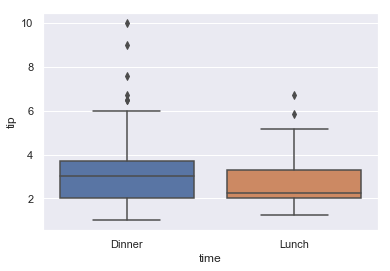

In [136]:
sns.boxplot(x="time", y="tip", data=tips,order=["Dinner", "Lunch"])

#### Draw a boxplot for each numeric variable in a DataFrame:

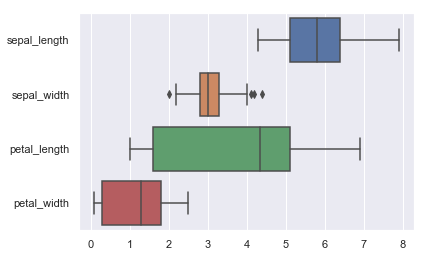

In [139]:
iris = sns.load_dataset("iris")
sns.boxplot(data=iris, orient="h")


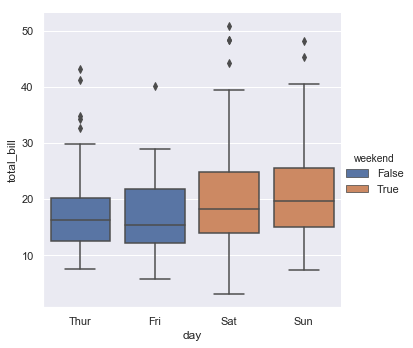

In [52]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",kind="box", dodge=False, data=tips);
sns.boxplot(x="day", y="total_bill", hue="weekend",data=tips, dodge=False)

#### Draw a single horizontal boxplot:

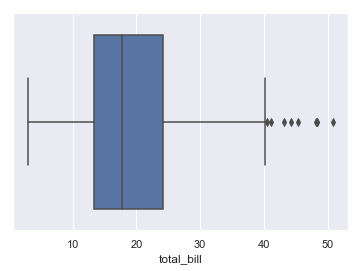

In [129]:
tips = sns.load_dataset("tips")
sns.boxplot(x=tips["total_bill"])

#### Draw a vertical boxplot grouped by a categorical variable:

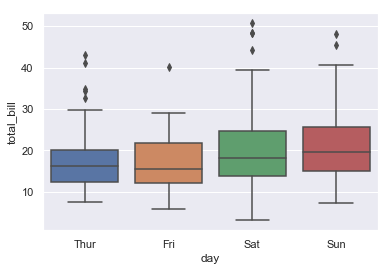

In [130]:
sns.boxplot(x="day", y="total_bill", data=tips)

#### Use swarmplot() to show the datapoints on top of the boxes:

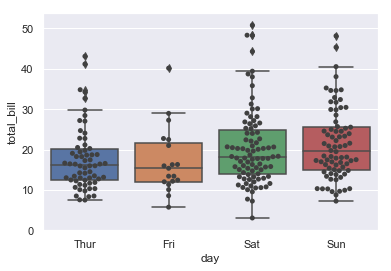

In [141]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

####  Use catplot() to combine a pointplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

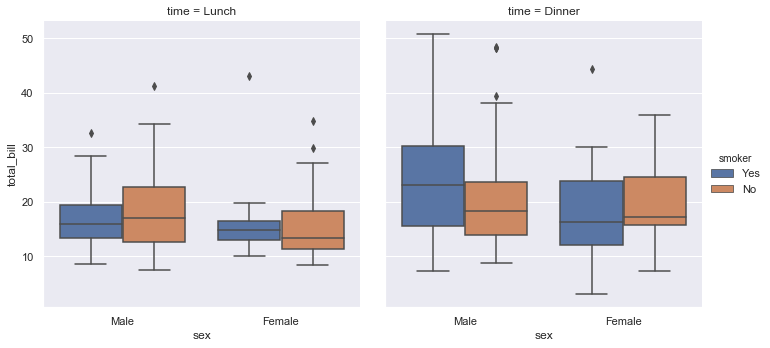

In [143]:
sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="box")

A related function, boxenplot(), draws a plot that is similar to a box plot but __optimized__ for showing more information about the shape of the distribution. It is best suited for __larger datasets:__

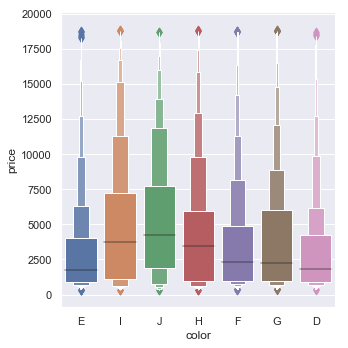

In [56]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen", data= diamonds)

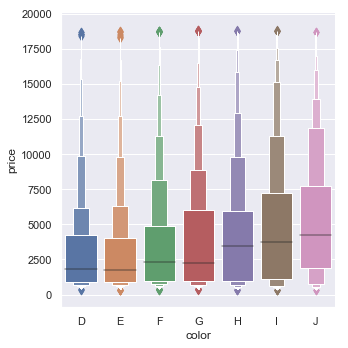

In [57]:
sns.catplot(x="color", y="price", kind="boxen", data= diamonds.sort_values('color'))

#### Violinplots

A different approach is a violinplot(), which combines a __boxplot__ with the __kernel density estimation__ procedure 

'This approach uses the kernel density estimate to provide a richer description of the distribution of values. \n Additionally, the quartile and whikser values from the boxplot are shown inside the violin. The downside is that,\n because the violinplot uses a KDE, there are some other parameters that may need tweaking,\n adding some complexity relative to the straightforward boxplot:'

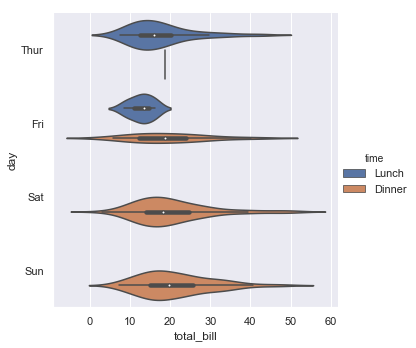

In [115]:
sns.catplot(x = 'total_bill', y ='day', hue = 'time', data = tips, kind = 'violin')
'''This approach uses the kernel density estimate to provide a richer description of the distribution of values. 
 Additionally, the quartile and whikser values from the boxplot are shown inside the violin. The downside is that,
 because the violinplot uses a KDE, there are some other parameters that may need tweaking,
 adding some complexity relative to the straightforward boxplot:'''

It’s also possible to “split” the violins when the hue parameter has __only two levels__

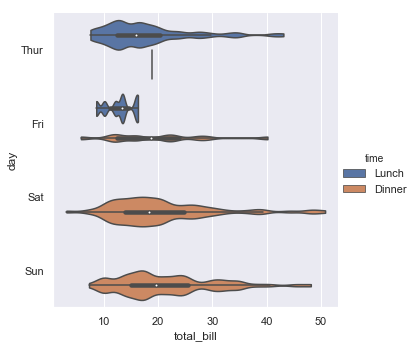

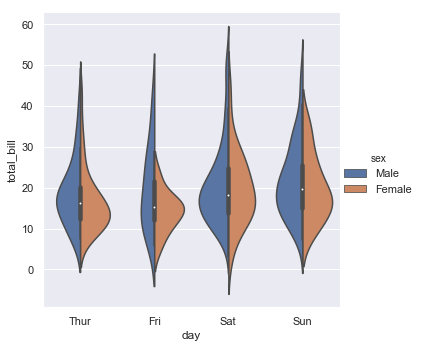

In [116]:
sns.catplot(x="total_bill", y="day", hue="time",kind="violin", bw=.15, cut=0, data=tips);
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips);

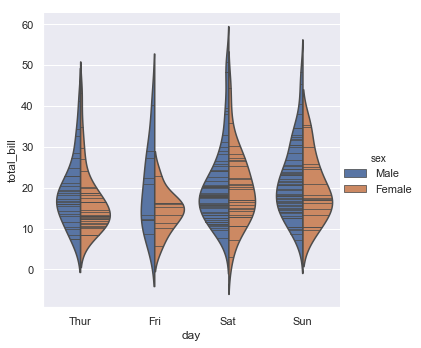

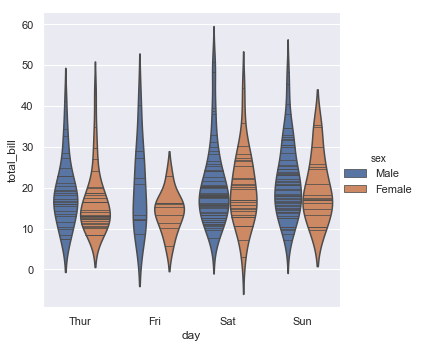

In [117]:
# interior of the violins

sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", inner="stick", split=True, data=tips);
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", inner="stick", data=tips);

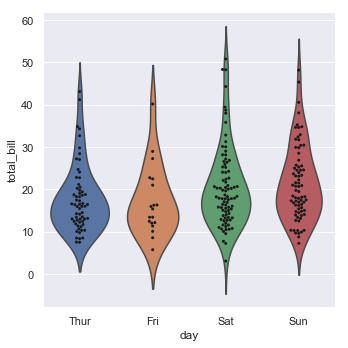

In [71]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

#### Draw a single horizontal violinplot

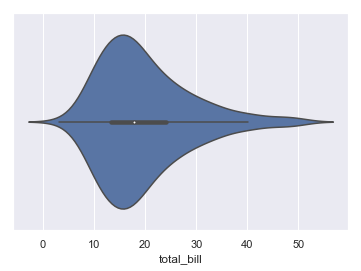

In [124]:
tips = sns.load_dataset("tips")
sns.violinplot(x=tips["total_bill"])

#### Draw a vertical violinplot grouped by a categorical variable

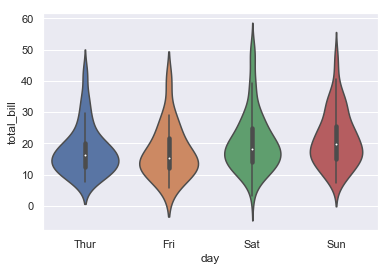

In [125]:
sns.violinplot(x="day", y="total_bill", data=tips)

#### Draw a violinplot with nested grouping by two categorical variables:

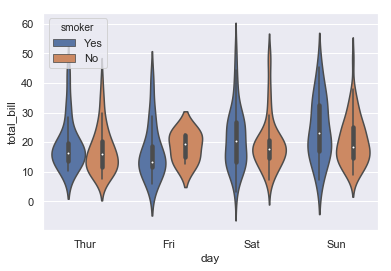

In [126]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips)

#### Scale the violin width by the number of observations in each bin:

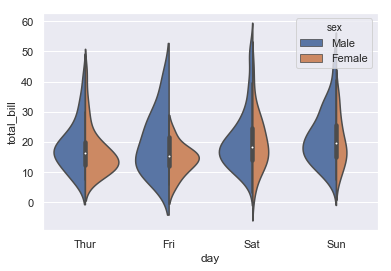

In [127]:
sns.violinplot(x="day", y="total_bill", hue="sex",data=tips,split=True,scale="count")

#### Draw the quartiles as horizontal lines instead of a mini-box

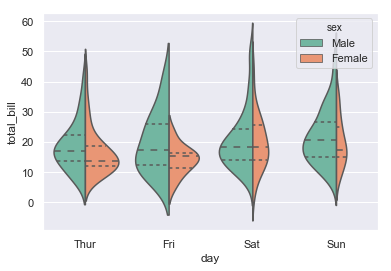

In [128]:
sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2", split=True,scale="count", inner="quartile")

# Statistical estimation within categories

### Bar plots

In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

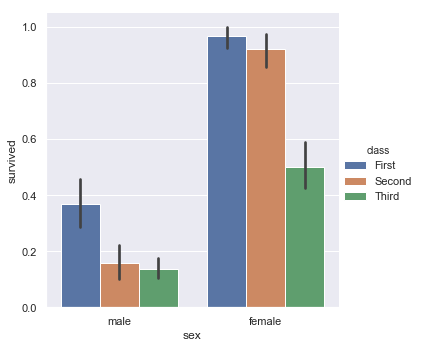

In [77]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

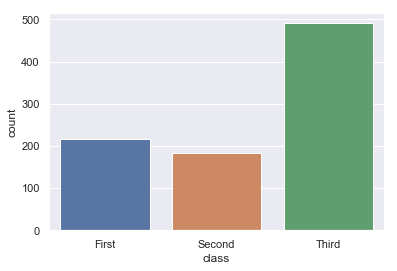

In [165]:
titanic = sns.load_dataset("titanic")
sns.countplot(x="class", data=titanic)

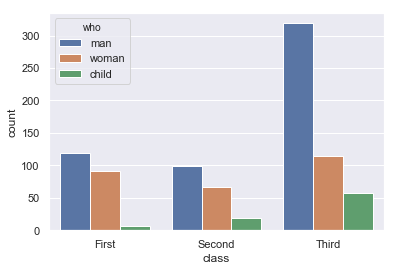

In [166]:
sns.countplot(x="class", hue="who", data=titanic)

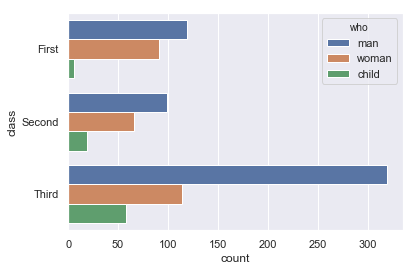

In [167]:
sns.countplot(y="class", hue="who", data=titanic)

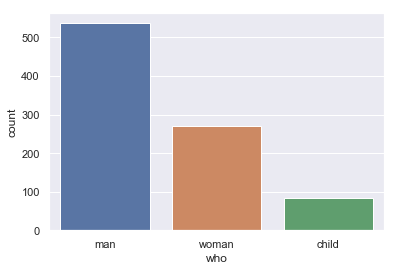

In [168]:
sns.countplot(x="who", data=titanic)

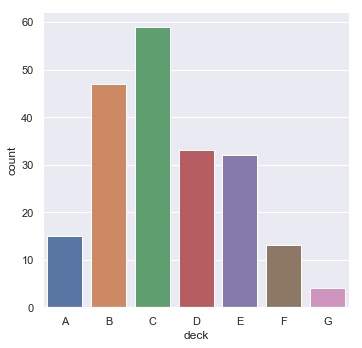

In [73]:
sns.catplot(x="deck", kind="count", data=titanic);

Both barplot() and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

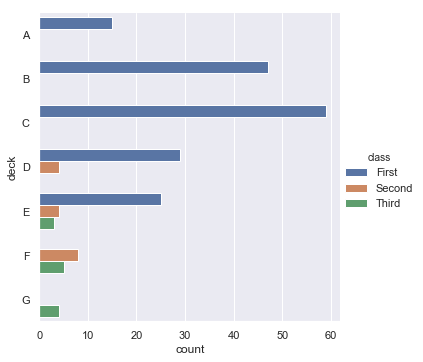

In [78]:
sns.catplot(y="deck", hue="class", kind="count", data=titanic);

Use catplot() to combine a countplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

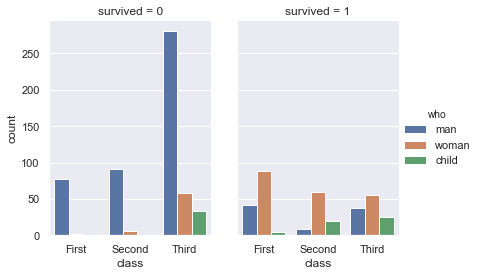

In [169]:
sns.catplot(x="class", hue="who", col="survived",data=titanic, kind="count",height=4, aspect=.7);

### Point plots
This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes:

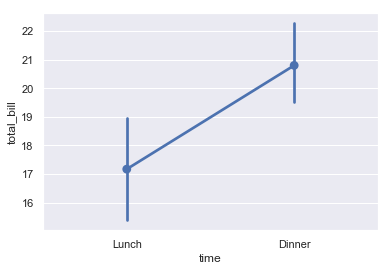

In [171]:
tips = sns.load_dataset("tips")
sns.pointplot(x="time", y="total_bill", data=tips)

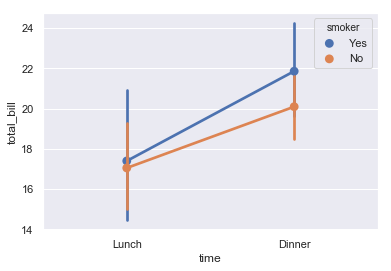

In [172]:
# Draw a set of vertical points with nested grouping by a two variables
sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips)

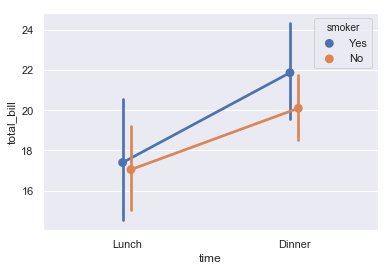

In [178]:
# Separate the points for different hue levels along the categorical axis:
sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips, dodge=True)
sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips, palette="Set2")

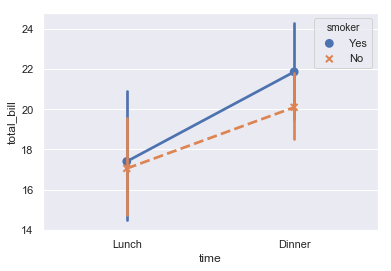

In [174]:
# Use a different marker and line style for the hue levels:
sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips,markers=["o", "x"],linestyles=["-", "--"])

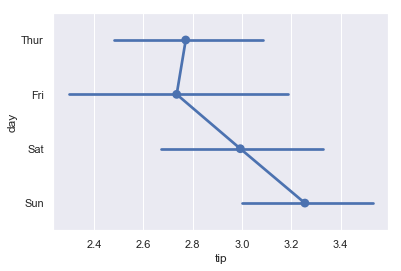

In [175]:
sns.pointplot(x="tip", y="day", data=tips)

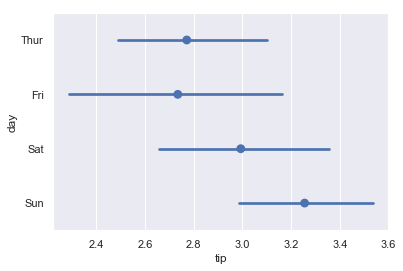

In [176]:
# Don’t draw a line connecting each point:
sns.pointplot(x="tip", y="day", data=tips, join=False)

#### Use median as the estimate of central tendency:


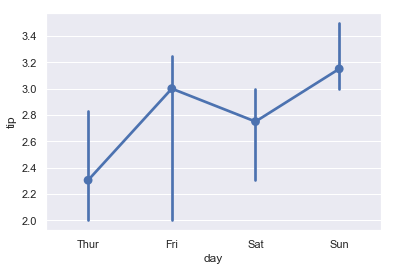

In [180]:
from numpy import median
sns.pointplot(x="day", y="tip", data=tips, estimator=median)

#### Show the standard error of the mean with the error bars:

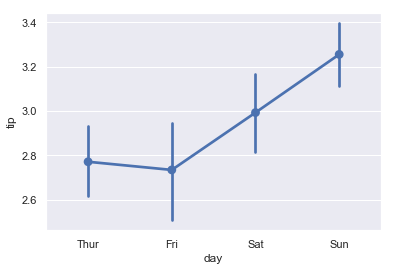

In [181]:
sns.pointplot(x="day", y="tip", data=tips, ci=68)

#### Show standard deviation of observations instead of a confidence interval:


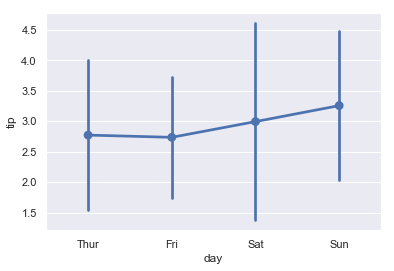

In [182]:
sns.pointplot(x="day", y="tip", data=tips, ci="sd")

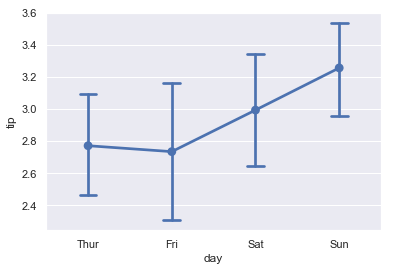

In [183]:
# cap Size

sns.pointplot(x="day", y="tip", data=tips, capsize=.2)

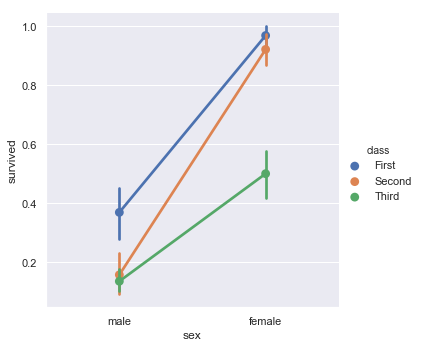

In [79]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

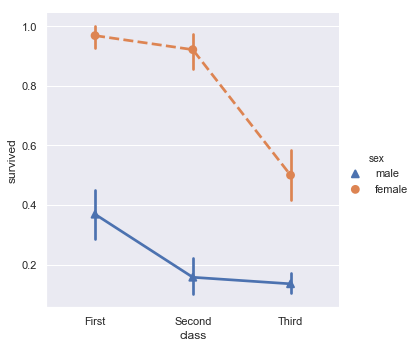

In [82]:
sns.catplot(x="class", y="survived", hue="sex",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

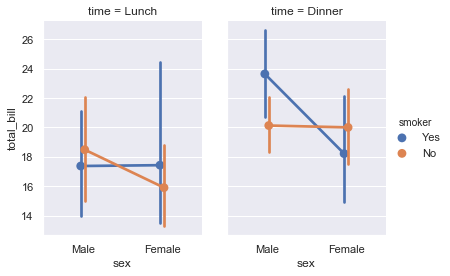

In [184]:
sns.catplot(x="sex", y="total_bill", hue="smoker", col="time",data=tips, kind="point",dodge=True,height=4, aspect=.7);

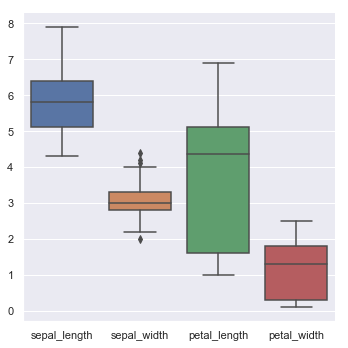

In [84]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, kind="box");

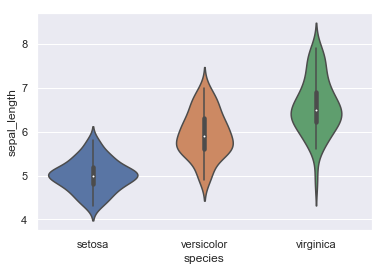

In [85]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

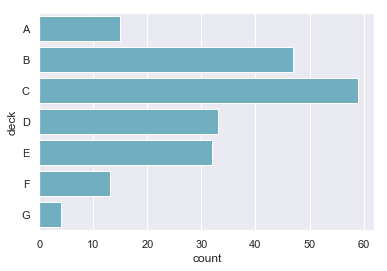

In [86]:
sns.countplot(y="deck", data=titanic, color="c");

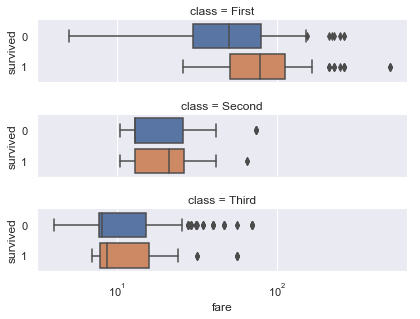

In [88]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))

g.set(xscale="log");

    - The distribution plot visualizes the distribution of data.
    - The distribution plot is suitable for comparing range and distribution for groups of numerical data. The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.

## Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distribution

#### Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).



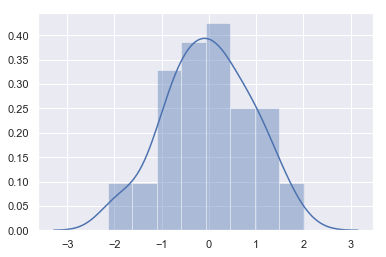

In [90]:
x = np.random.normal(size=100)
sns.distplot(x);

#### Histograms
Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

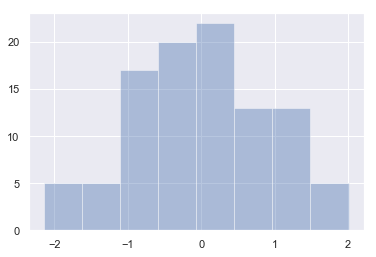

In [97]:
sns.distplot(x, kde=False)


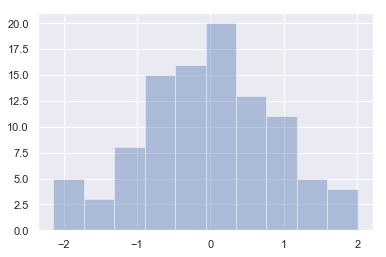

In [102]:
'''When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:
'''
sns.distplot(x, bins=10, kde=False)

### Kernel density estimation

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

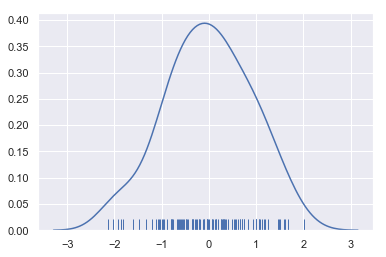

In [103]:
sns.distplot(x, hist=False, rug=True);

### Plotting bivariate distributions
It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

Plot different plots in the same plot.

In [106]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

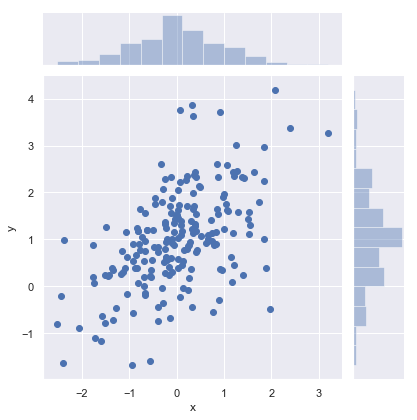

In [108]:
sns.jointplot(x="x", y="y", data=df);  # Default is Scatterplots

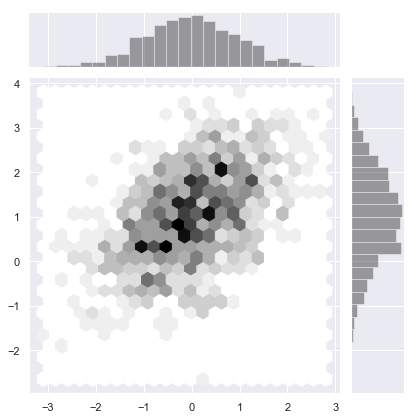

In [111]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex", color="k");

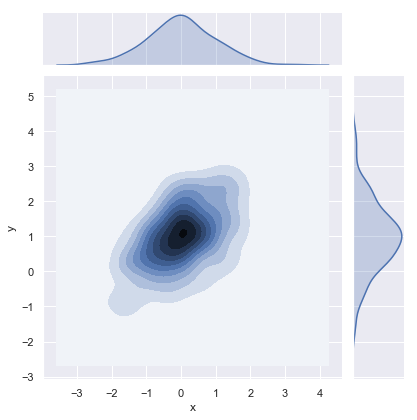

In [112]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

# Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal 

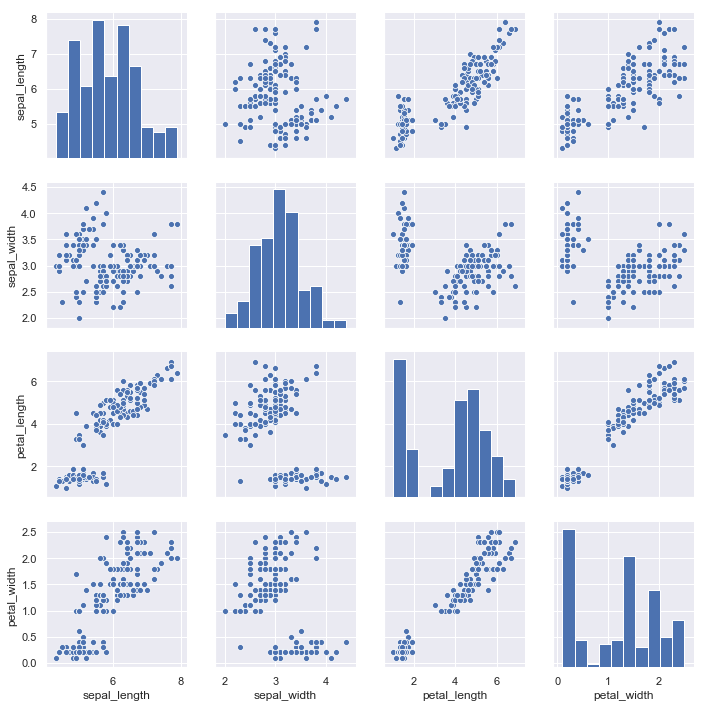

In [113]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

# PairGrid plot

        PairGrid allows us to draw a grid of subplots using the same plot type to visualize data.
        Unlike FacetGrid, it uses different pair of variable for each subplot.
        It forms a matrix of sub-plots. It is also sometimes called as “scatterplot matrix”.

In [259]:
iris = sns.load_dataset('iris')

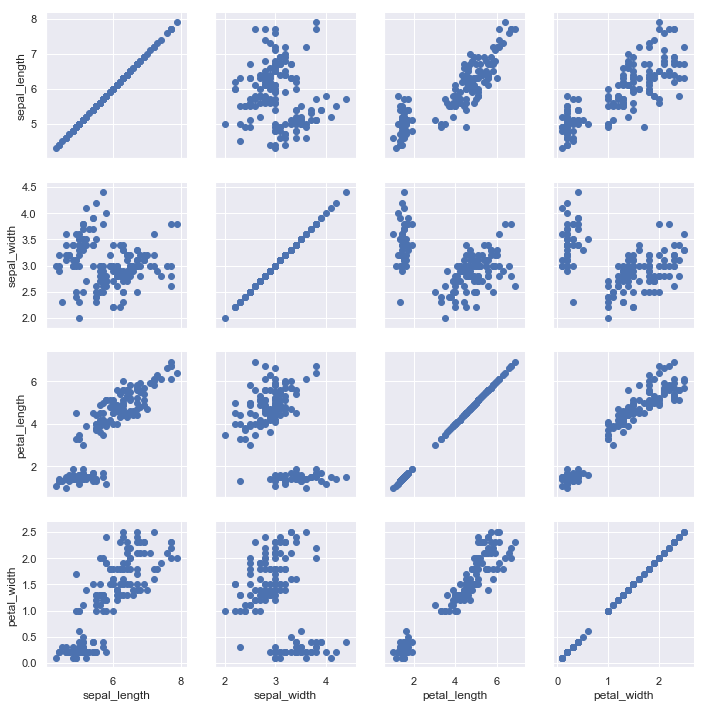

In [260]:
x = sns.PairGrid(iris)
x = x.map(plt.scatter)

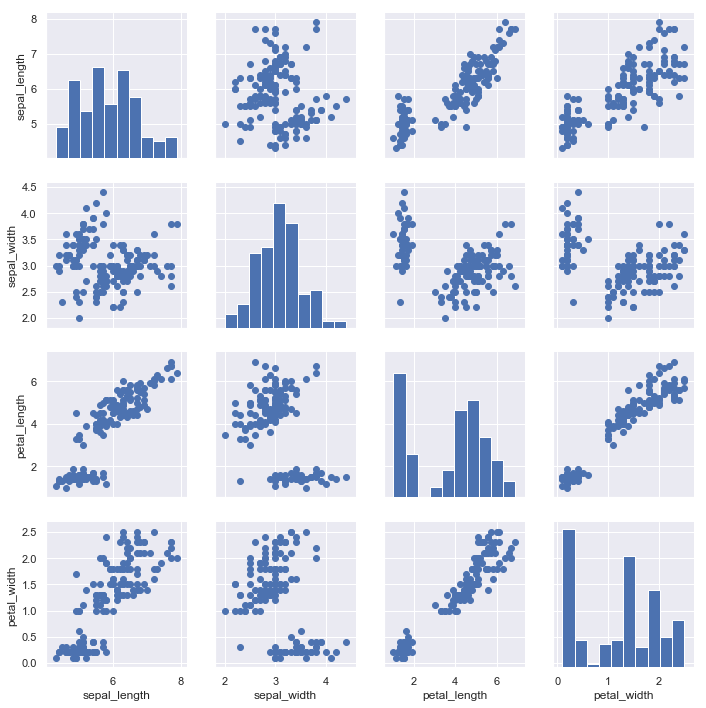

In [261]:
x = sns.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

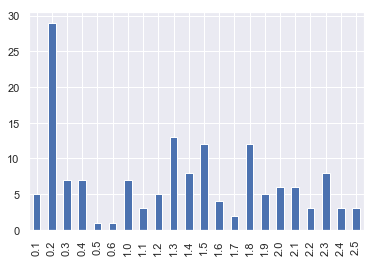

In [262]:
x = iris.petal_width.value_counts()
x = x.sort_index()
x.plot('bar')

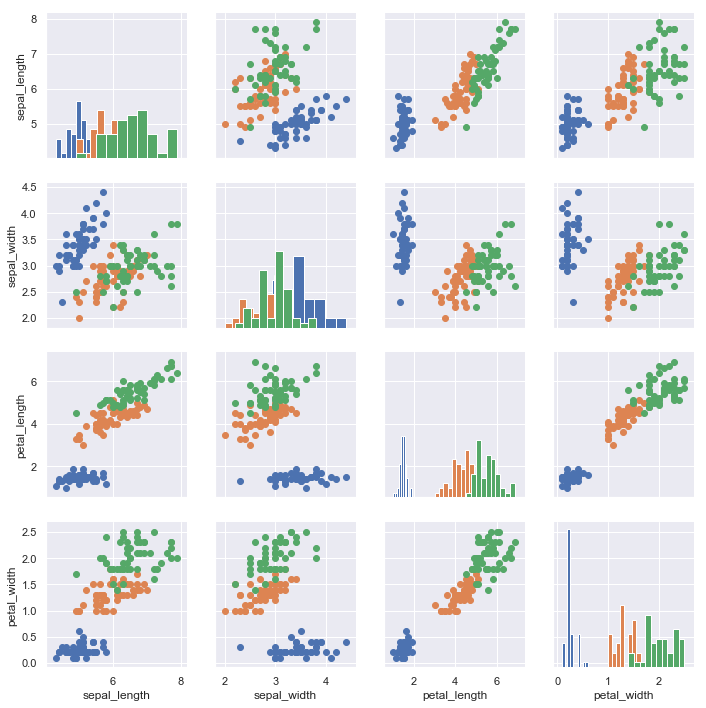

In [263]:
x = sns.PairGrid(iris, hue='species')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

In [264]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

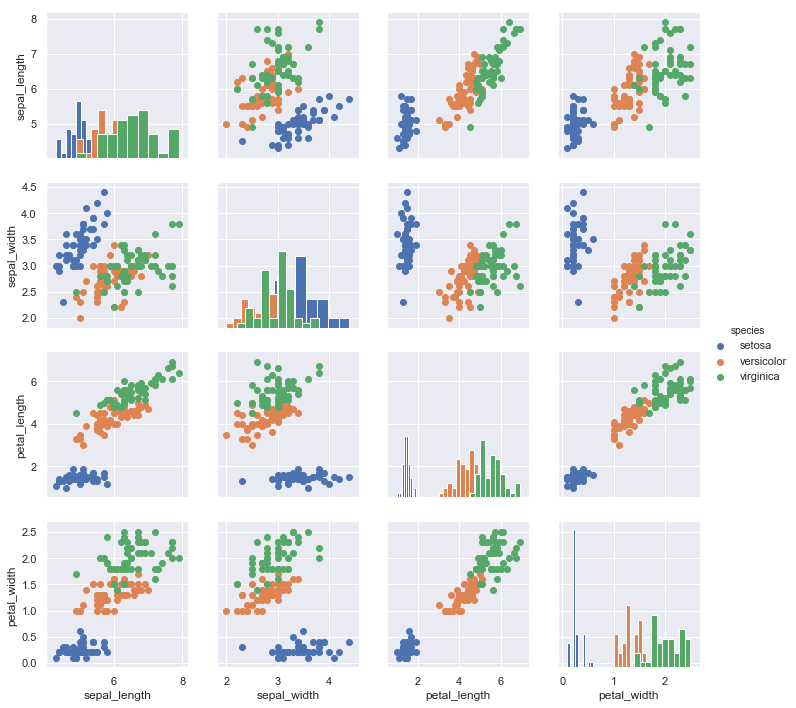

In [265]:
x = sns.PairGrid(iris, hue='species')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x.add_legend()

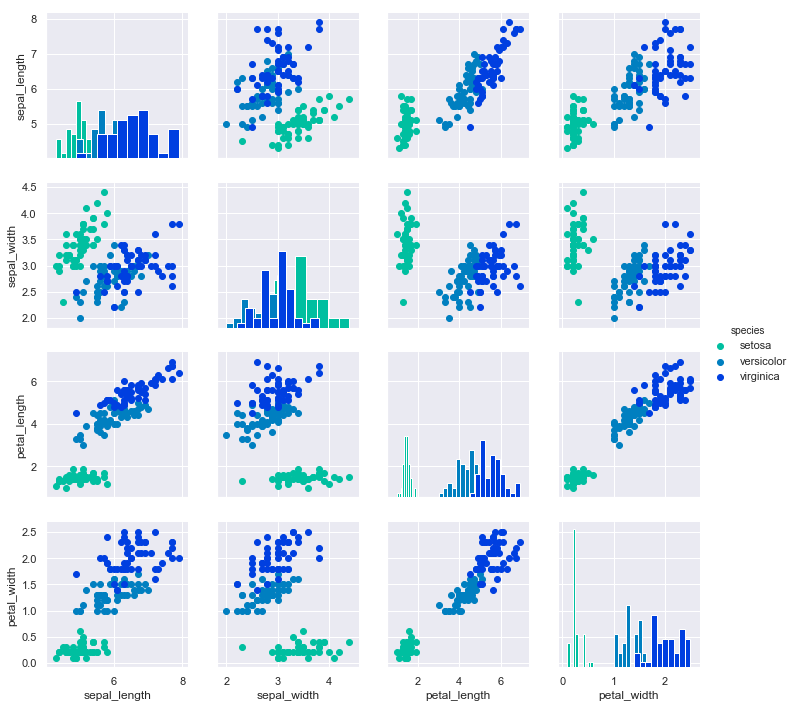

In [266]:
x = sns.PairGrid(iris, hue='species', palette='winter_r') # coolwarm, husl, winter_r, RdBu.
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x.add_legend()

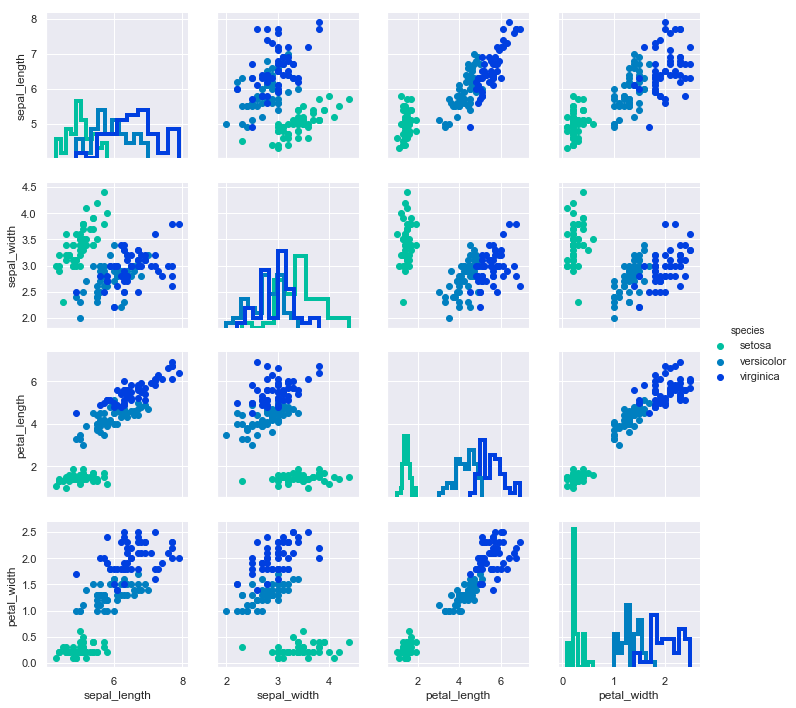

In [267]:
x = sns.PairGrid(iris, hue='species', palette='winter_r') # autumn, coolwarm, husl, winter_r, RdBu.
x = x.map_diag(plt.hist, histtype='step', linewidth=4)
x = x.map_offdiag(plt.scatter)
x.add_legend()

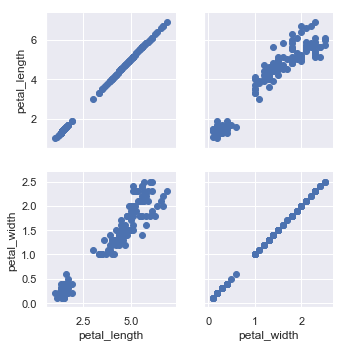

In [268]:
x = sns.PairGrid(iris, vars=['petal_length', 'petal_width'])
x = x.map(plt.scatter)

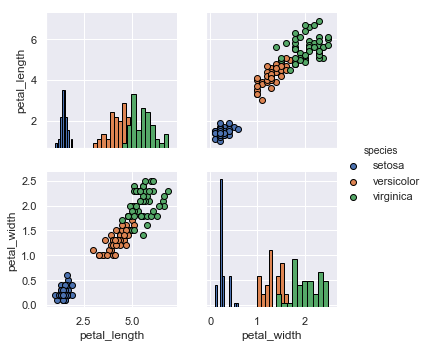

In [269]:
x = sns.PairGrid(iris, hue='species', vars=['petal_length', 'petal_width'])
x = x.map_diag(plt.hist, edgecolor='black')
x = x.map_offdiag(plt.scatter, edgecolor='black')
x = x.add_legend()

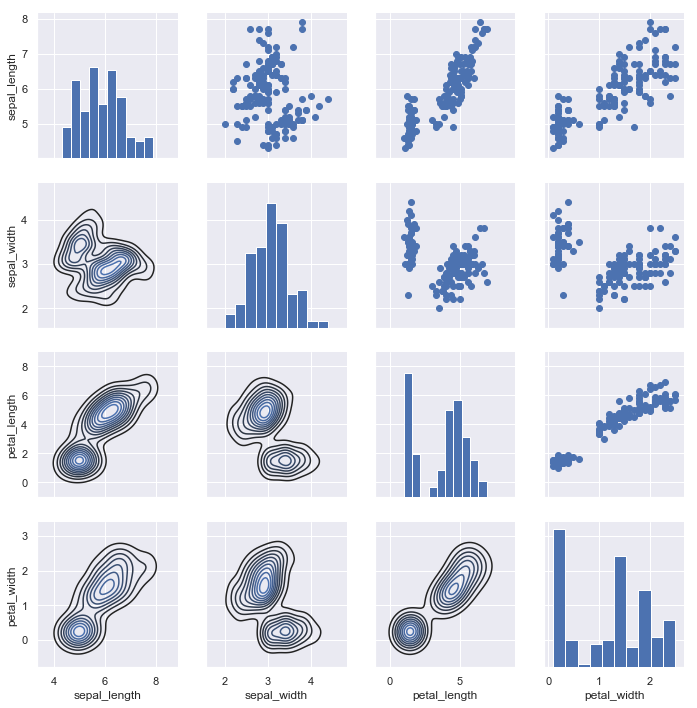

In [270]:
x = sns.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot)

# seaborn.FacetGrid

### Building structured multi-plot grids
When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice”, or “trellis” plotting, and it is related to the idea of “small multiples”. It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Conditional small multiples

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the row, column, or hue dimensions of the grid. These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis. For example, say we wanted to examine differences between lunch and dinner in the tips dataset.



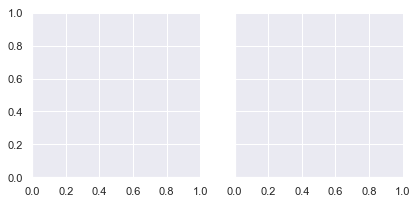

In [187]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips, col="time")

Initializing the grid like this sets up the matplotlib figure and axes, but doesn’t draw anything on them
The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting 
function and the name(s) of variable(s) in the dataframe to plot. Let’s look at the distribution of tips in each of
these subsets, using a histogram.

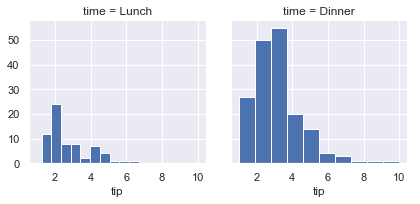

In [192]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

This function will draw the figure and annotate the axes, hopefully producing a finished plot in one step. 
To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:


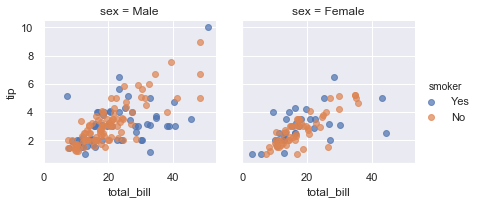

In [193]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

There are several options for controlling the look of the grid that can be passed to the class constructor.

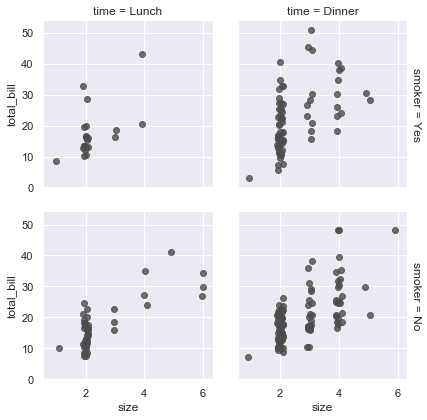

In [195]:
g= sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

Note that margin_titles isn’t formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can’t be used with a legend that lies outside of the plot.

The size of the figure is set by providing the height of each facet, along with the aspect ratio:

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


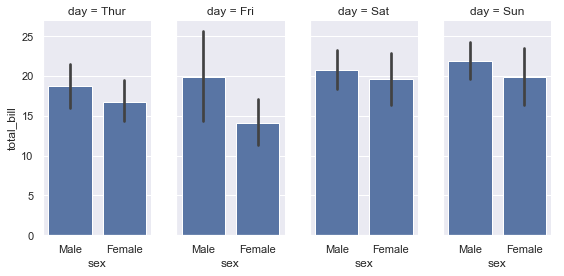

In [199]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate *_order parameter

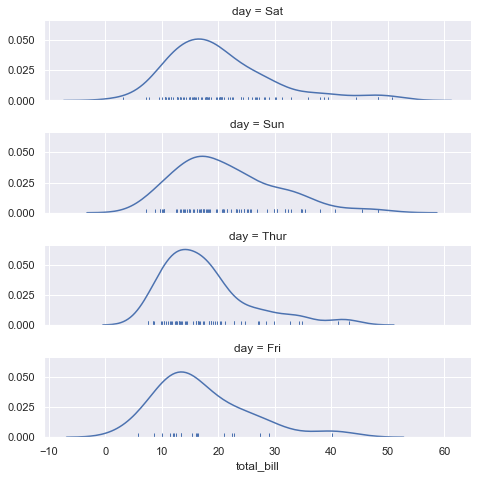

In [207]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True)


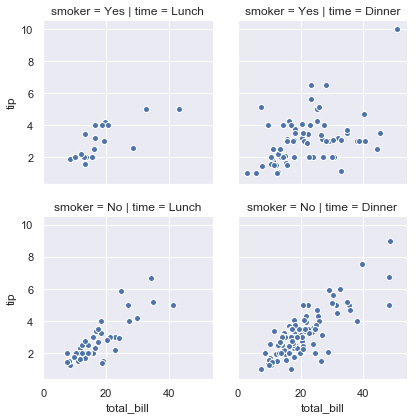

In [208]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor="w")

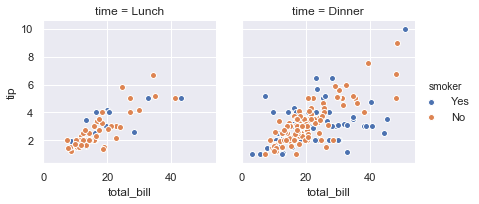

In [209]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w").add_legend())

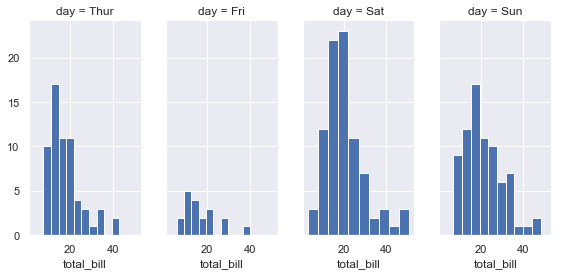

In [211]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g = g.map(plt.hist, "total_bill", bins=(10,50))

# seaborn.heatmap
This heat map works by correlation. This shows you which variables are correlated to each other from a scale of 1 being the most correlated and -1 is not correlated at all. However, you cannot correlate strings. You can only correlate numerical features. Don’t let this stop you because you can always encode your categorical data types using the get_dummies function in Pandas library. I am adding the figure size so that we get a bigger image. You can do this by adding plt.figure() function.

    A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors.
    It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to.

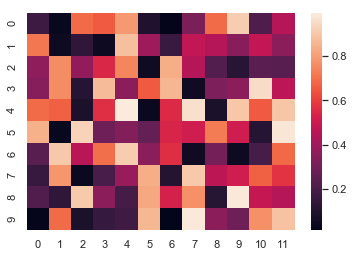

In [212]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

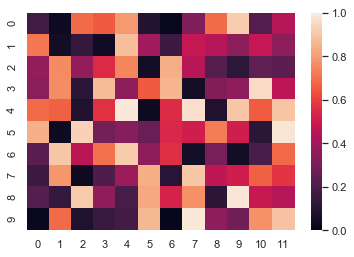

In [215]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

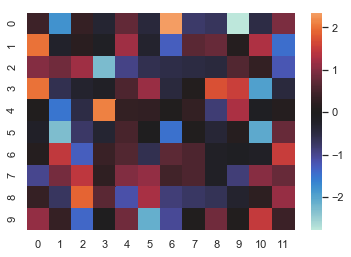

In [217]:
# Plot a heatmap for data centered on 0 with a diverging colormap:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)


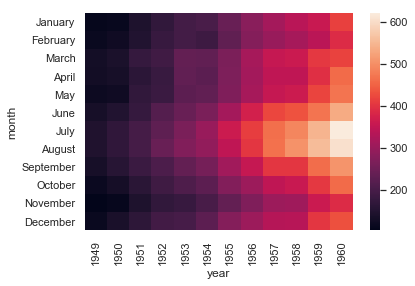

In [221]:
# Plot a dataframe with meaningful row and column labels:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)

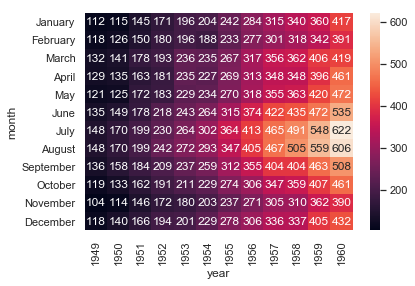

In [222]:
# Annotate each cell with the numeric value using integer formatting:
sns.heatmap(flights, annot=True, fmt="d")

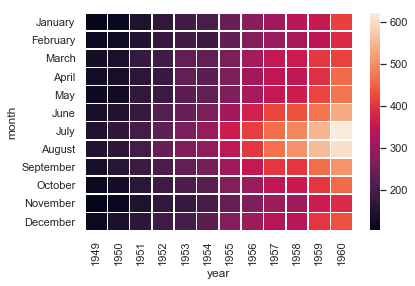

In [224]:
# Add lines between each cell:
sns.heatmap(flights, linewidths=.5)

#### Use a mask to plot only part of a matrix

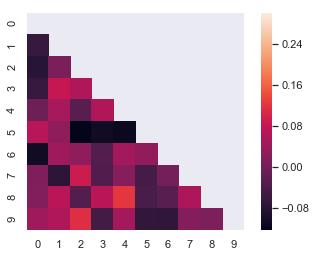

In [225]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [228]:
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

'Once you have the heat map created, let’s make it more actionable by changing the styles. Add correlation numbers to get a better understanding of it. You can do this by adding the annot parameter which will add correlation numbers to each cell in the visuals.'

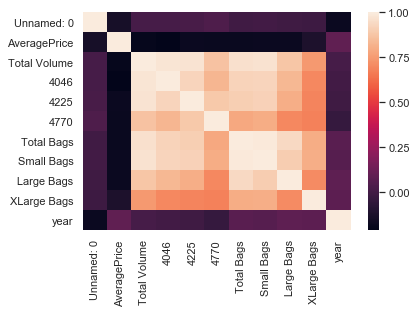

In [242]:
sns.heatmap(df.corr())
'''Once you have the heat map created, let’s make it more actionable by changing the styles. Add correlation numbers to get a better understanding of it. You can do this by adding the annot parameter which will add correlation numbers to each cell in the visuals.'''

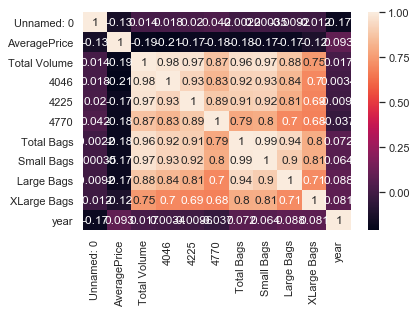

In [249]:
sns.heatmap(df.corr(),annot=True)

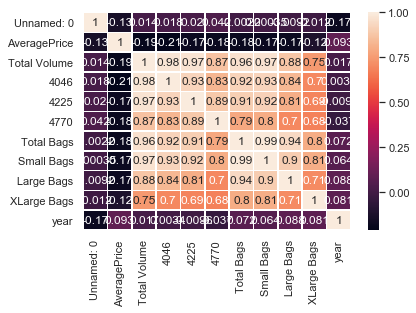

In [250]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

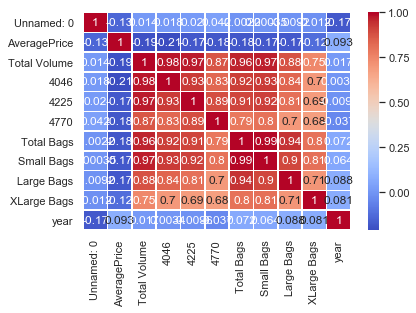

In [251]:
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

# Clustermap plot
- Plots a matrix dataset as a hierarchically-clustered heatmap.

In [273]:
flights = sns.load_dataset('flights')
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [274]:
flights = flights.pivot('month', 'year', 'passengers')
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

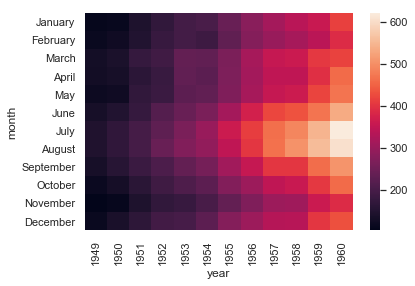

In [276]:
sns.heatmap(flights)

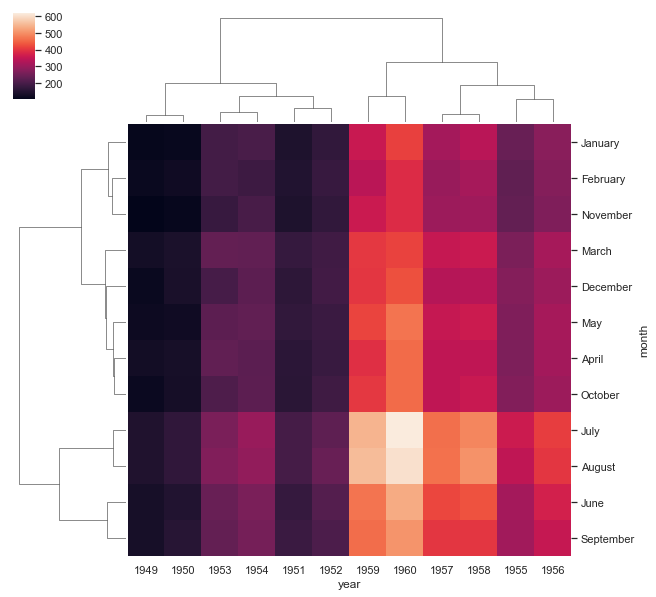

In [277]:
sns.clustermap(flights)

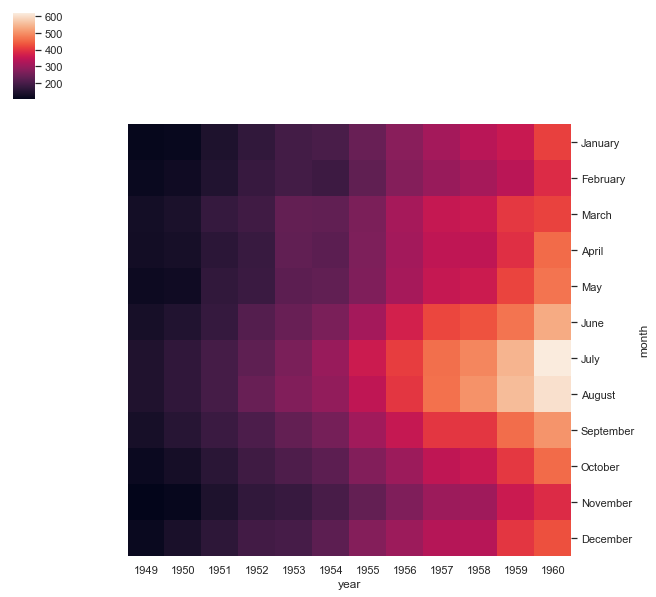

In [279]:
sns.clustermap(flights, col_cluster=False, row_cluster=False)

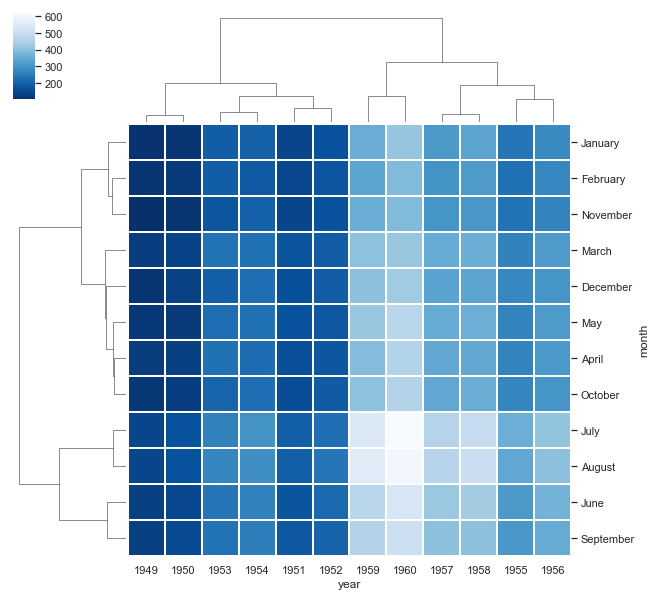

In [280]:
sns.clustermap(flights, cmap='Blues_r', linewidth=1) # coolwarm, Blues_r

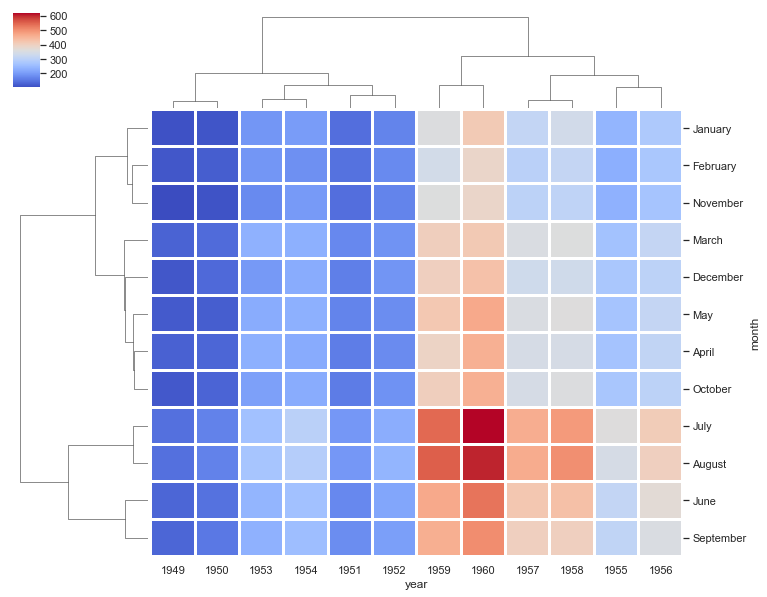

In [282]:
sns.clustermap(flights, cmap='coolwarm', linewidth=2, figsize=(12,10))

## Standardize across col or rows = 0/1 = rows/columns

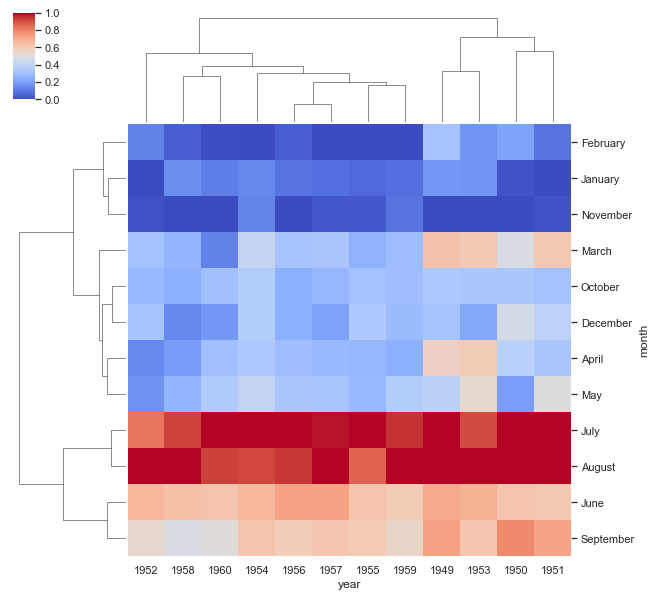

In [283]:
sns.clustermap(flights, cmap='coolwarm', standard_scale=1) # 1 - columns

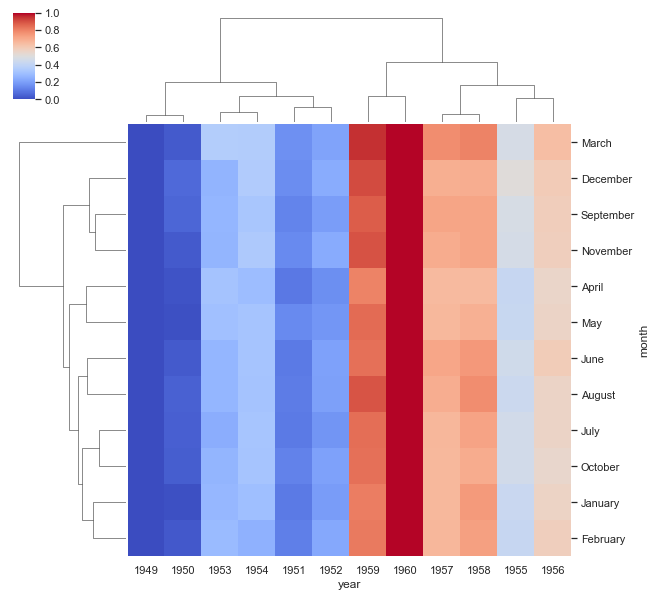

In [284]:
sns.clustermap(flights, cmap='coolwarm', standard_scale=0) # 0 - rows

### Normalize our dataset = z_score = 0/1 = rows/columns

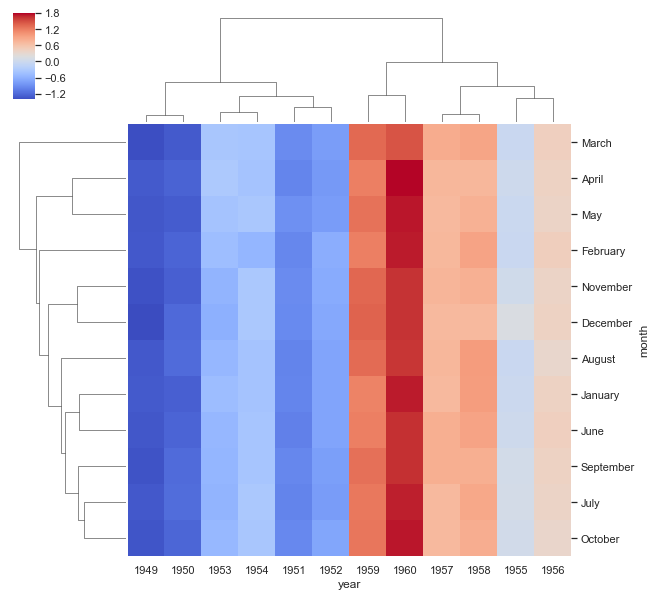

In [285]:
sns.clustermap(flights, cmap='coolwarm', z_score=0) # 0 - rows